In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
#0.load data
dt=pd.read_csv("D:\Data\python\data0.csv") 

#show the top 5 rows of data
dt.head()

,id,grp1,grp2,cov1,cov2,cov3,cov4,f1,f2,f3,f4,out1,out2,out3,out4,out4t
0,1,0,2,10.588393,5.765045,0,2,8.883864,0.791934,1,1,5.031413,0,1,1,201
1,2,1,0,10.095498,5.273806,0,1,8.497210,0.881411,1,0,5.737039,0,2,1,125
2,3,0,2,10.221286,5.135972,1,2,8.175174,0.177713,0,2,5.387061,1,2,0,152
3,4,1,3,10.884562,5.459708,0,0,8.421732,0.052869,1,3,5.031891,0,2,1,148
4,5,0,2,10.707055,5.306728,0,1,8.714487,0.128239,1,1,5.337904,1,1,0,127


In [175]:
#1. classification 
# linear discriminant analysis, Bayes discriminant analysis, k-nearest neighbor, decision tree, random forest, support vector machine
dt_used=dt[["grp2","cov1","cov2","f1","f2","out3"]]
dt_used.head()

,grp2,cov1,cov2,f1,f2,out3
0,2,10.588393,5.765045,8.883864,0.791934,1
1,0,10.095498,5.273806,8.497210,0.881411,2
2,2,10.221286,5.135972,8.175174,0.177713,2
3,3,10.884562,5.459708,8.421732,0.052869,2
4,2,10.707055,5.306728,8.714487,0.128239,1


In [200]:
from sklearn.cross_validation import train_test_split as tts
from sklearn.cross_validation import cross_val_score as cvs
x=dt_used.iloc[:,1:]
y=dt_used.iloc[:,0:1]
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25)
x_train.head()

,cov1,cov2,f1,f2,out3
171,10.822257,5.855306,8.279727,0.937507,3
112,10.134087,5.096231,8.740490,0.257318,3
125,10.321824,5.817894,8.326908,0.218260,3
40,10.998129,5.505672,8.024901,0.975610,1
160,10.773399,5.051859,8.842208,0.305688,2


In [204]:
y_train.head()

,grp2
171,3
112,0
125,1
40,2
160,3


In [201]:
x_test.head()

,cov1,cov2,f1,f2,out3
136,10.342818,5.787513,8.317879,0.710011,0
170,10.062724,5.973029,8.367860,0.195345,0
173,10.433966,5.272041,8.298163,0.110731,3
155,10.029907,5.558818,8.720394,0.095509,0
46,10.506779,5.616125,8.345628,0.376033,3


In [203]:
y_test.head()

,grp2
136,0
170,3
173,0
155,3
46,3


In [177]:
#1.1 linear discrimimant analysis

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
dt_lda=LDA()
dt_lda.fit(x_train,y_train.values.ravel())
dt_lda_train_pred=dt_lda.predict(x_train)
dt_lda_test_pred=dt_lda.predict(x_test)

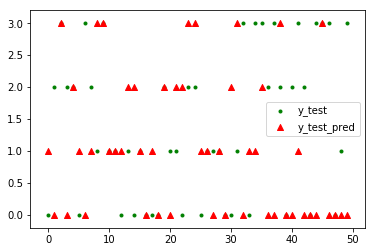

In [179]:
plt.scatter(range(len(y_test)),y_test,marker=".",label="y_test",color="g")
plt.scatter(range(len(dt_lda_test_pred)),dt_lda_test_pred,marker="^",label="y_test_pred",color="r")
plt.legend()
plt.show()

In [180]:
from sklearn.metrics import classification_report as cls_res
print(cls_res(y_train.values.ravel(),dt_lda_train_pred))
print(cls_res(y_test.values.ravel(),dt_lda_test_pred))

             precision    recall  f1-score   support

          0       0.34      0.50      0.40        44
          1       0.38      0.46      0.41        39
          2       0.33      0.11      0.17        35
          3       0.40      0.31      0.35        32

avg / total       0.36      0.36      0.34       150

             precision    recall  f1-score   support

          0       0.30      0.40      0.34        15
          1       0.36      0.42      0.38        12
          2       0.25      0.18      0.21        11
          3       0.38      0.25      0.30        12

avg / total       0.32      0.32      0.31        50



In [181]:
#1.2 Bayes discriminant analysis
from sklearn.naive_bayes import GaussianNB as gnb
dt_bayes=gnb().fit(x_train,y_train.values.ravel())
dt_bayes_train_pred=dt_bayes.predict(x_train)
dt_bayes_test_pred=dt_bayes.predict(x_test)

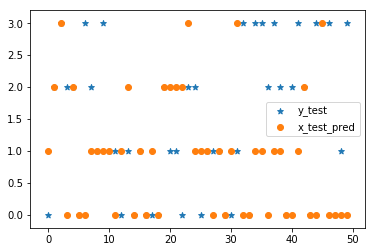

In [182]:
plt.scatter(range(len(y_test)),y_test,marker="*",label="y_test")
plt.scatter(range(len(dt_bayes_test_pred)),dt_bayes_test_pred,marker="o",label="x_test_pred")
plt.legend()
plt.show()

In [183]:
print(cls_res(y_train.values.ravel(),dt_bayes_train_pred))
print(cls_res(y_test.values.ravel(),dt_bayes_test_pred))

             precision    recall  f1-score   support

          0       0.41      0.50      0.45        44
          1       0.43      0.56      0.49        39
          2       0.50      0.29      0.36        35
          3       0.56      0.44      0.49        32

avg / total       0.47      0.45      0.45       150

             precision    recall  f1-score   support

          0       0.45      0.60      0.51        15
          1       0.28      0.42      0.33        12
          2       0.50      0.36      0.42        11
          3       0.50      0.17      0.25        12

avg / total       0.43      0.40      0.39        50



In [184]:
#1.3 k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier as kns

In [185]:
dt_knn=kns(algorithm="kd_tree")
dt_knn.fit(x_train,y_train.values.ravel())
dt_knn_train_pred=dt_knn.predict(x_train)
dt_knn_test_pred=dt_knn.predict(x_test)

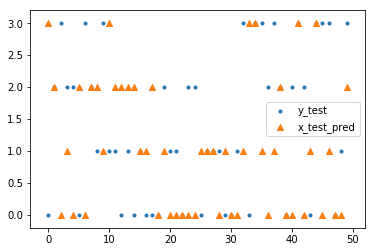

In [186]:
plt.scatter(range(len(y_test)),y_test,marker=".",label="y_test")
plt.scatter(range(len(dt_knn_test_pred)),dt_knn_test_pred,marker="^",label="x_test_pred")
plt.legend()
plt.show()

In [187]:
print(cls_res(y_train,dt_knn_train_pred))
print(cls_res(y_test,dt_knn_test_pred))

             precision    recall  f1-score   support

          0       0.48      0.66      0.55        44
          1       0.58      0.72      0.64        39
          2       0.61      0.40      0.48        35
          3       0.50      0.28      0.36        32

avg / total       0.54      0.53      0.52       150

             precision    recall  f1-score   support

          0       0.26      0.33      0.29        15
          1       0.21      0.25      0.23        12
          2       0.27      0.27      0.27        11
          3       0.50      0.25      0.33        12

avg / total       0.31      0.28      0.28        50



In [188]:
#1.4 decision tree

In [189]:
from sklearn.tree import DecisionTreeClassifier as dtc
dt_tree=dtc()
dt_tree.fit(x_train,y_train.values.ravel())
dt_tree_train_pred=dt_tree.predict(x_train)
dt_tree_test_pred=dt_tree.predict(x_test)

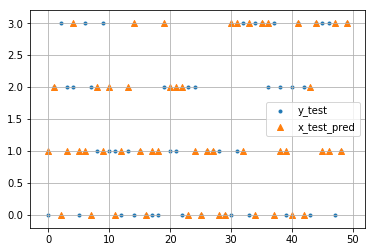

In [190]:
plt.scatter(range(len(y_test)),y_test,marker=".",label="y_test")
plt.scatter(range(len(dt_tree_test_pred)),dt_tree_test_pred,marker="^",label="x_test_pred")
plt.legend()
plt.grid()
plt.show()

In [191]:
print(cls_res(y_train,dt_tree_train_pred))
print(cls_res(y_test,dt_tree_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       1.00      1.00      1.00        39
          2       1.00      1.00      1.00        35
          3       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       150

             precision    recall  f1-score   support

          0       0.25      0.20      0.22        15
          1       0.22      0.33      0.27        12
          2       0.12      0.09      0.11        11
          3       0.33      0.33      0.33        12

avg / total       0.24      0.24      0.23        50



In [192]:
#1.5 random forest

In [193]:
from sklearn.ensemble import RandomForestClassifier as rfc
dt_rf=rfc(n_estimators=100)
dt_rf.fit(x_train,y_train.values.ravel())
dt_rf_train_pred=dt_rf.predict(x_train)
dt_rf_test_pred=dt_rf.predict(x_test)

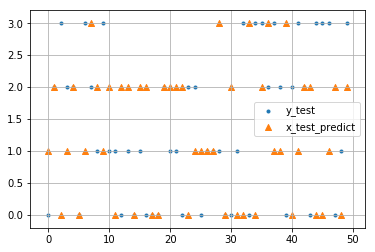

In [194]:
plt.scatter(range(len(y_test)),y_test,marker=".",label="y_test")
plt.scatter(range(len(dt_rf_test_pred)),dt_rf_test_pred,marker="^",label="x_test_predict")
plt.legend()
plt.grid()
plt.show()

In [195]:
print(cls_res(y_train,dt_rf_train_pred))
print(cls_res(y_test,dt_rf_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       1.00      1.00      1.00        39
          2       1.00      1.00      1.00        35
          3       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       150

             precision    recall  f1-score   support

          0       0.33      0.33      0.33        15
          1       0.17      0.17      0.17        12
          2       0.22      0.36      0.28        11
          3       0.00      0.00      0.00        12

avg / total       0.19      0.22      0.20        50



In [196]:
#1.6 support vector machine

In [197]:
from sklearn import svm
dt_svm=svm.SVC()
dt_svm.fit(x_train,y_train.values.ravel())
dt_svm_train_pred=dt_svm.predict(x_train)
dt_svm_test_pred=dt_svm.predict(x_test)

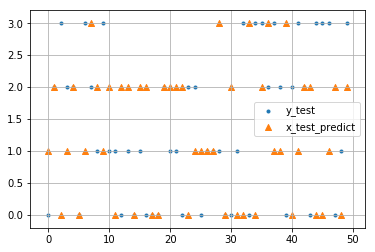

In [198]:
plt.scatter(range(len(y_test)),y_test,marker=".",label="y_test")
plt.scatter(range(len(dt_rf_test_pred)),dt_rf_test_pred,marker="^",label="x_test_predict")
plt.legend()
plt.grid()
plt.show()

In [199]:
print(cls_res(y_train,dt_rf_train_pred))
print(cls_res(y_test,dt_rf_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       1.00      1.00      1.00        39
          2       1.00      1.00      1.00        35
          3       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       150

             precision    recall  f1-score   support

          0       0.33      0.33      0.33        15
          1       0.17      0.17      0.17        12
          2       0.22      0.36      0.28        11
          3       0.00      0.00      0.00        12

avg / total       0.19      0.22      0.20        50

